In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import streamlit as st
import altair as alt
import plotly.express as px


In [25]:
data = pd.read_csv('/Users/deshawncouch/SDtoolsProject/vehicles_us.csv')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [27]:
data.duplicated().sum()

0

In [28]:
data.head(50
        )

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [29]:
data['model_year'].isna().sum()

3619

In [41]:
data['is_4wd']= data['is_4wd'].fillna(0)
data['is_4wd'] = data['is_4wd'].astype('bool')
data['model_year']= data['model_year'].fillna(0)
data['model_year']= data['model_year'].astype('int')
data['odometer']=data['odometer'].fillna(0)
data['odometer']=data['odometer'].astype('int')
data['cylinders']=data['cylinders'].fillna(0)   
data['cylinders']=data['cylinders'].astype('int')   
data.sample(50)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
37187,18997,2015,toyota sienna,like new,6,gas,47399,automatic,mini-van,blue,False,2018-09-19,44
33316,11900,2014,ford mustang,excellent,6,gas,0,automatic,convertible,black,False,2019-03-29,32
10579,3000,2007,honda accord,good,4,gas,202000,manual,sedan,grey,False,2018-07-29,29
40857,10500,2007,cadillac escalade,good,8,gas,195294,automatic,SUV,black,True,2019-02-23,34
9844,6795,2009,ford mustang,good,6,gas,95627,automatic,coupe,silver,False,2018-06-08,37
12679,6500,0,ford f350,good,8,diesel,298761,automatic,truck,white,True,2018-10-19,23
14163,9995,1996,ford f-150,excellent,8,gas,204055,manual,truck,blue,False,2018-07-17,53
26728,29900,2014,ram 2500,good,6,diesel,94323,automatic,truck,blue,True,2019-01-11,1
38099,19500,2014,ford f-150,excellent,8,gas,26878,automatic,truck,blue,True,2019-04-02,28
26242,13000,2009,ford f150 supercrew cab xlt,excellent,8,gas,74000,automatic,pickup,NaN,False,2019-03-03,42


# Histogram comparing price of vehicle to days listed

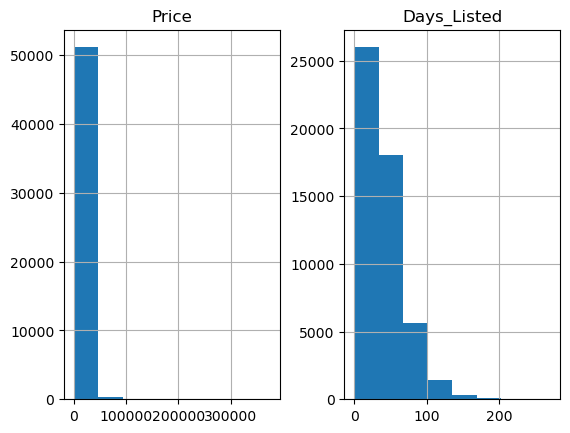

In [58]:
prices = data['price']
dlist = data['days_listed']

values = pd.DataFrame({ 
    'Price': prices, 
    'Days_Listed': dlist
    }) 

# Creating Histograms of columns 'Length', 
# 'Breadth', 'Height' and 'Weight' 
# using Dataframe.hist() function 
hist = values.hist(bins=8
                   ) 
